In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
#import dataset
marketing_df = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round2.csv')

In [40]:
def drop_columns(marketing_df) :
    marketing_df.drop(columns=['Unnamed: 0'], inplace=True)
    return marketing_df

In [42]:
drop_columns(marketing_df['Unnamed: 0'])

0            0.0
1        33813.5
2            2.0
3            3.0
4            4.0
          ...   
10905    33813.5
10906    10906.0
10907    10907.0
10908    10908.0
10909    33813.5
Name: Unnamed: 0, Length: 10910, dtype: float64

In [43]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
marketing_df.dtypes

Unnamed: 0                       float64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location Code                     object
Marital Status                    object
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [5]:
numeric_int = marketing_df.select_dtypes(include = int)
numeric_int

,Unnamed: 0,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies
0,0,48029,61,52,9
1,1,0,64,26,1
2,2,22139,100,31,2
3,3,49078,97,3,2
4,4,23675,117,31,7
...,...,...,...,...,...
10905,10905,0,253,40,7
10906,10906,61146,65,68,6
10907,10907,39837,201,63,2
10908,10908,64195,158,27,6


In [6]:
numeric_float = marketing_df.select_dtypes(include = float)
numeric_float

,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [7]:
categoricals = marketing_df.select_dtypes(include = object)
categoricals

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [8]:
numerical = pd.concat([numeric_int,numeric_float], axis=1)
numerical

,Unnamed: 0,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,0,48029,61,52,9,4809.216960,7.0,0.0,292.800000
1,1,0,64,26,1,2228.525238,3.0,0.0,744.924331
2,2,22139,100,31,2,14947.917300,34.0,0.0,480.000000
3,3,49078,97,3,2,22332.439460,10.0,0.0,484.013411
4,4,23675,117,31,7,9025.067525,NaN,NaN,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,0,253,40,7,15563.369440,NaN,NaN,1214.400000
10906,10906,61146,65,68,6,5259.444853,7.0,0.0,273.018929
10907,10907,39837,201,63,2,23893.304100,11.0,0.0,381.306996
10908,10908,64195,158,27,6,11971.977650,0.0,4.0,618.288849


In [9]:
# Do the distributions for different numerical variables look like a normal distribution
normalized_numerical=(numerical-numerical.min())/(numerical.max()-numerical.min())

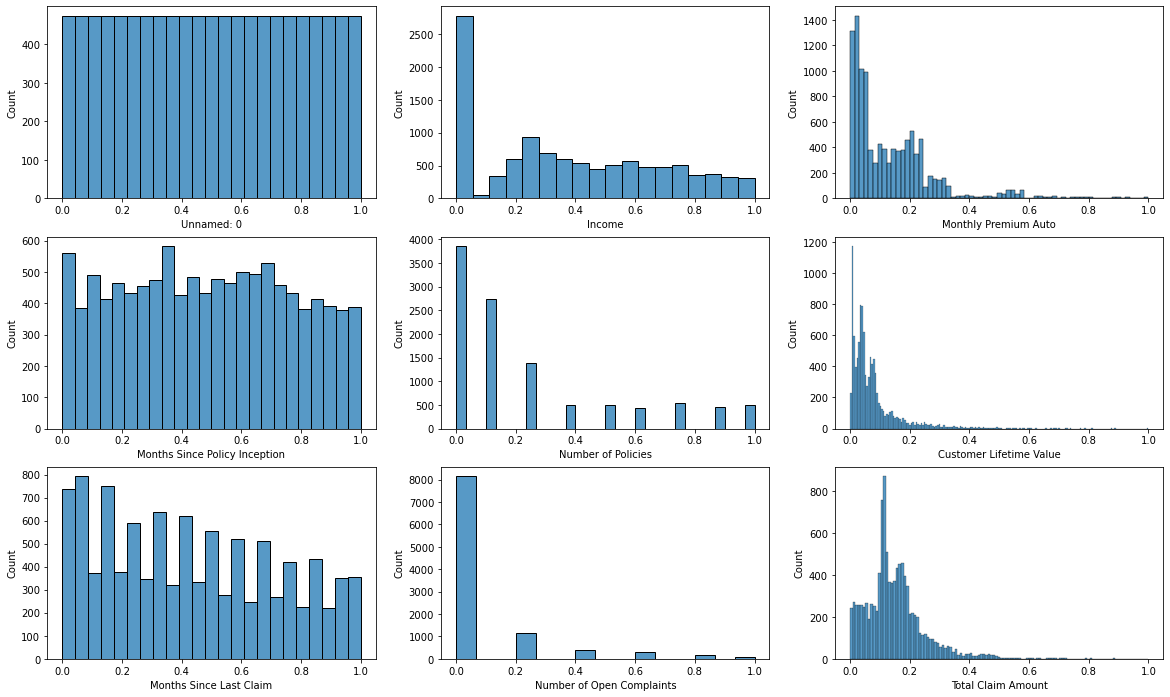

In [10]:
plt.figure(figsize=(20,12))
for i, column in enumerate(normalized_numerical.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(normalized_numerical[column])

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Count'>

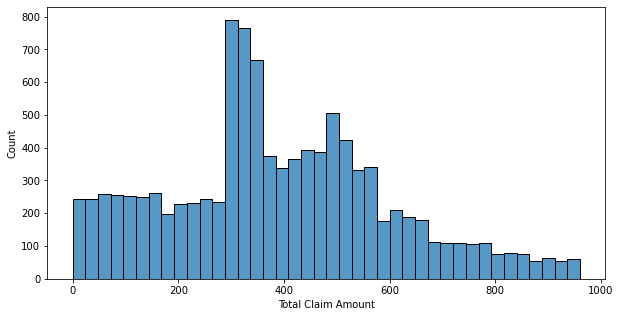

In [16]:
#detect and remove outliers
# 'Total Claim Amount'
Q1_tca = np.percentile(numerical['Total Claim Amount'], 25)
Q3_tca = np.percentile(numerical['Total Claim Amount'], 75)
IQR_Total_Claim_Amount = Q3_tca - Q1_tca
IQR_Total_Claim_Amount
max_Total_Claim_Amount = numerical['Total Claim Amount'] <= (Q3_tca + 1.5 * IQR_Total_Claim_Amount)
max_Total_Claim_Amount
cleaned__Total_Claim_Amount = numerical['Total Claim Amount'][max_Total_Claim_Amount]
cleaned__Total_Claim_Amount
#plot the cleaned 'Total Claim Amount'
plt.figure(figsize=(10,5))
sns.histplot(cleaned__Total_Claim_Amount)

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Count'>

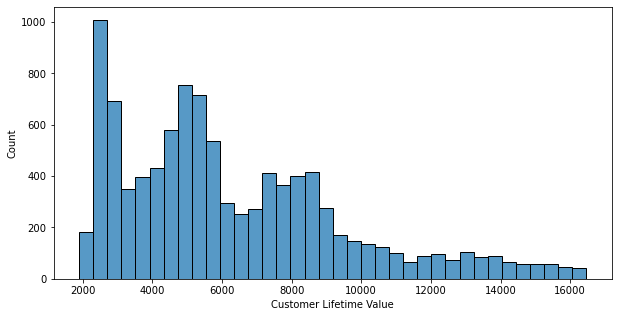

In [20]:
#detect and remove outliers
# 'Customer Lifetime Value'
Q1_clt = np.percentile(numerical['Customer Lifetime Value'], 25)
Q3_clt = np.percentile(numerical['Customer Lifetime Value'], 75)
IQR_Customer_Lifetime_Value = Q3_clt - Q1_clt
IQR_Customer_Lifetime_Value
max_Customer_Lifetime_Value = numerical['Customer Lifetime Value'] <= (Q3_clt + 1.5 * IQR_Customer_Lifetime_Value)
max_Total_Claim_Amount
cleaned__Customer_Lifetime_Value = numerical['Customer Lifetime Value'][max_Customer_Lifetime_Value]
cleaned__Total_Claim_Amount
#plot the cleaned 'Customer Lifetime Value'
plt.figure(figsize=(10,5))
sns.histplot(cleaned__Customer_Lifetime_Value )

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Count'>

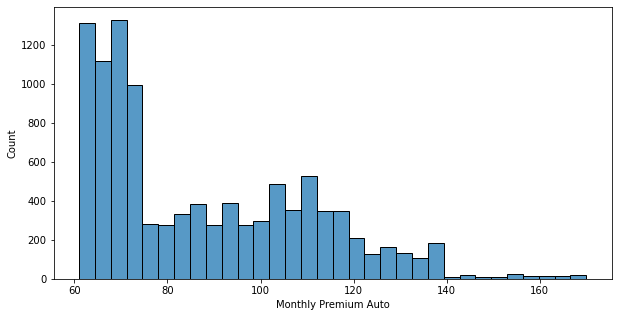

In [24]:
#detect and remove outliers
# 'Monthly Premium Auto'
Q1_mpa = np.percentile(numerical['Monthly Premium Auto'], 25)
Q3_mpa = np.percentile(numerical['Monthly Premium Auto'], 75)
IQR_Monthly_Premium_Auto = Q3_mpa - Q1_mpa
IQR_Monthly_Premium_Auto
max_Monthly_Premium_Auto = numerical['Monthly Premium Auto'] <= (Q3_mpa + 1.5 * IQR_Monthly_Premium_Auto)
max_Monthly_Premium_Auto
cleaned_Monthly_Premium_Auto = numerical['Monthly Premium Auto'][max_Monthly_Premium_Auto]
cleaned_Monthly_Premium_Auto
#plot the cleaned 'Monthly Premium Auto'
plt.figure(figsize=(10,5))
sns.histplot(cleaned_Monthly_Premium_Auto)

<AxesSubplot:xlabel='Income', ylabel='Count'>

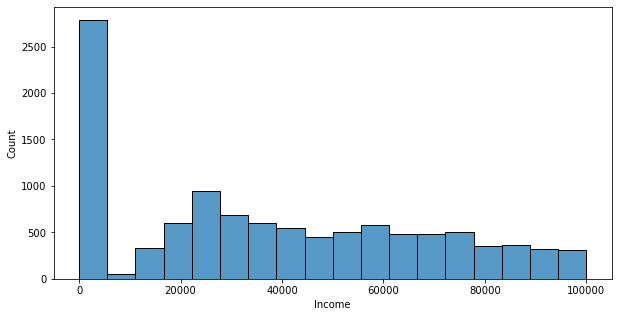

In [27]:
#detect and remove outliers
# Income
Q1_inc = np.percentile(numerical['Income'], 25)
Q3_inc = np.percentile(numerical['Income'], 75)
IQR_Income = Q3_inc - Q1_inc
IQR_Income
max_Income = numerical['Income'] <= (Q3_inc + 1.5 * IQR_Income)
max_Income
min_Income = numerical ['Income'] >= (Q1_inc -1.5 * IQR_Income)
cleaned_Income = numerical['Income'][min_Income]
cleaned_Income
#plot the cleaned 'Income'
plt.figure(figsize=(10,5))
sns.histplot(cleaned_Income)

In [30]:
median_income = marketing_df['Income'].median()

In [34]:
marketing_df.loc[marketing_df['Income'] == 0] = median_income

In [35]:
marketing_df['Income']

0        48029.0
1        33813.5
2        22139.0
3        49078.0
4        23675.0
          ...   
10905    33813.5
10906    61146.0
10907    39837.0
10908    64195.0
10909    33813.5
Name: Income, Length: 10910, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='Count'>

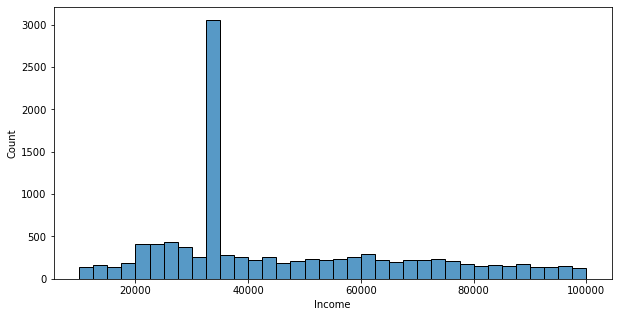

In [36]:
#plot the cleaned 'Income'
plt.figure(figsize=(10,5))
sns.histplot(marketing_df['Income'])

In [49]:
corr=numerical.iloc[:,1:9].corr()
corr

,Income,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
Income,1.000000,-0.009788,-0.005903,-0.009960,0.028306,-0.023814,0.007163,-0.354141
Monthly Premium Auto,-0.009788,1.000000,0.018953,-0.020505,0.403069,0.008744,-0.010350,0.631799
Months Since Policy Inception,-0.005903,0.018953,1.000000,-0.009123,0.016960,-0.039318,0.004376,0.003095
Number of Policies,-0.009960,-0.020505,-0.009123,1.000000,0.016024,0.007678,0.004098,-0.008923
Customer Lifetime Value,0.028306,0.403069,0.016960,0.016024,1.000000,0.016052,-0.032243,0.232626
Months Since Last Claim,-0.023814,0.008744,-0.039318,0.007678,0.016052,1.000000,0.002246,0.013137
Number of Open Complaints,0.007163,-0.010350,0.004376,0.004098,-0.032243,0.002246,1.000000,-0.011379
Total Claim Amount,-0.354141,0.631799,0.003095,-0.008923,0.232626,0.013137,-0.011379,1.000000


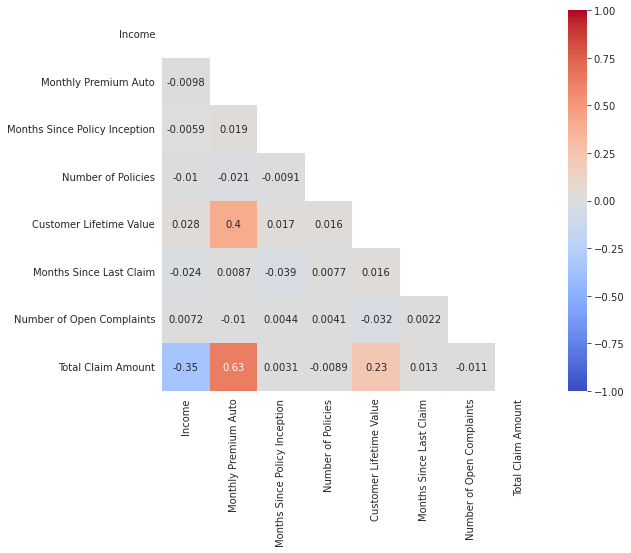

In [50]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax =plt.subplots(figsize=(9, 7))
    multicollinearity_ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)